In [1]:
import sys
print(sys.version)

3.6.6 | packaged by conda-forge | (default, Oct 12 2018, 14:08:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [9]:
import pandas as pd
print('pandas version:',pd.__version__)

pandas version: 0.23.4


In [2]:
import pandas_datareader.data as web

In [5]:
from datetime import datetime
start = datetime(2016, 1, 1)
end = datetime(2018, 11, 16)
SB = web.DataReader('207940.KS','yahoo',start,end)
SB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-10,148000,125500,135000,144000,7179018,144000
2016-11-11,186500,142000,149500,161500,8140539,161500
2016-11-14,177500,165000,165000,175500,2977177,175500
2016-11-15,181500,162500,179000,166000,2592949,166000
2016-11-16,173000,163500,168500,170000,1660976,170000


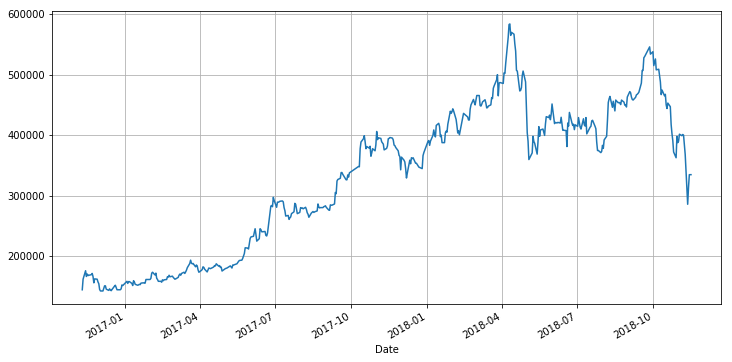

In [11]:
%matplotlib inline
SB['Close'].plot(figsize=(12,6), grid=True);

In [10]:
df = pd.DataFrame({'ds':SB.index, 'y':SB['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2016-11-10,144000
1,2016-11-11,161500
2,2016-11-14,175500
3,2016-11-15,166000
4,2016-11-16,170000


In [14]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(df);

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
852,2019-11-12
853,2019-11-13
854,2019-11-14
855,2019-11-15
856,2019-11-16


In [16]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
852,2019-11-12,209986.416292,88954.491097,326358.176797
853,2019-11-13,208921.437495,83512.798066,330333.567886
854,2019-11-14,207675.519117,84325.140966,330668.032301
855,2019-11-15,208576.663200,86941.259268,329665.501645
856,2019-11-16,205379.790809,72735.859083,331136.323191


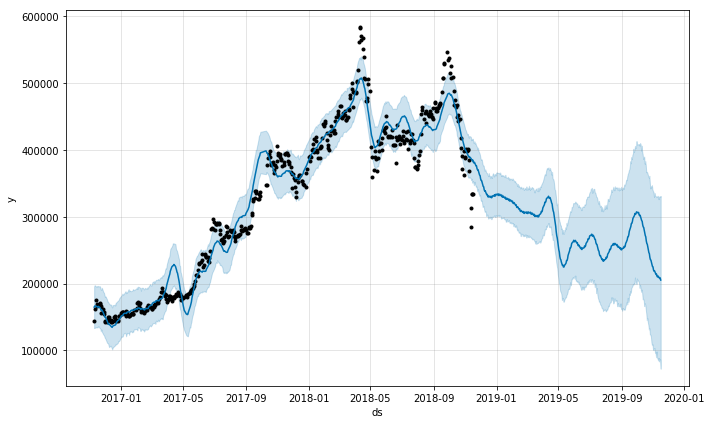

In [17]:
m.plot(forecast);

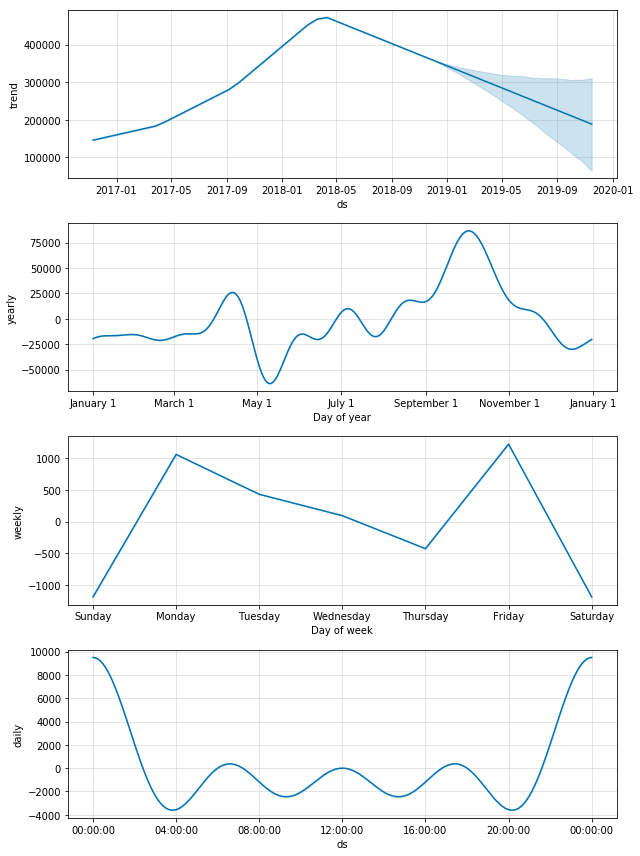

In [18]:
m.plot_components(forecast);

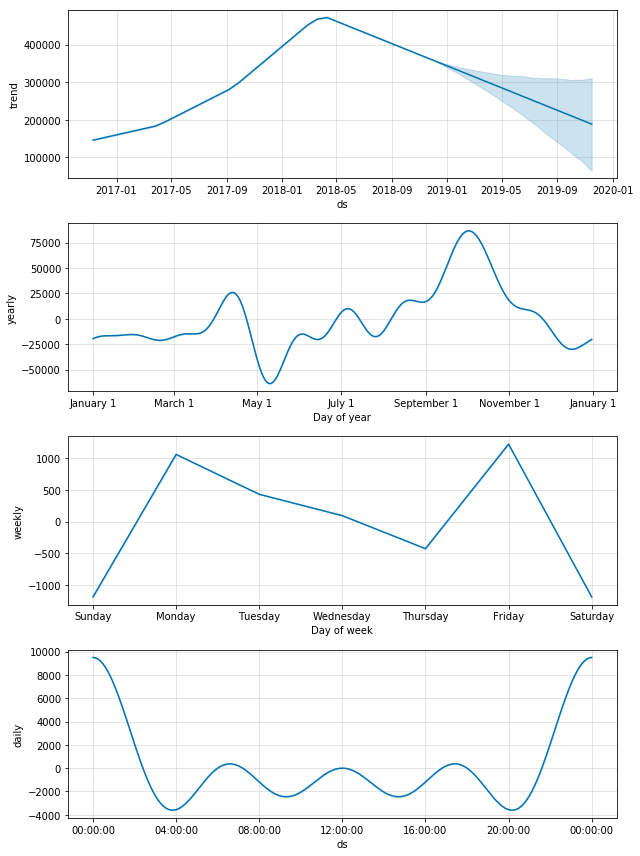

In [19]:
m.plot_components(forecast).savefig('test.png');